<img src="https://firebasestorage.googleapis.com/v0/b/habacuc-javascript.appspot.com/o/images%2FHS.png?alt=media&token=4e9389a4-52a1-4acc-b558-49a8763b2206" alt="HabaSoft" width="50" height="50">

# 0. VisionInsight

The objective of this project is to develop a machine learning model capable of predicting whether a person has diabetes based on a set of medical variables. Using a dataset from the National Institute of Diabetes and Digestive and Kidney Diseases, which includes data on women who are at least 21 years old and of Pima Indian heritage, the project will focus on analyzing variables such as the number of pregnancies, body mass index (BMI), insulin levels, and other diagnostic factors. The goal is to create a model that can assist in the early detection of diabetes, contributing to faster and more efficient diagnosis in vulnerable populations.

## Datacard

| Column | Description |
|--------|------------ |
| Pregnancies | Number of pregnancies |
| Glucose | Glucose level in blood |
| BloodPressure | Blood pressure measurement |
| SkinThickness | Thickness skin |
| Insulin | Insulin level in blood |
| BMI | Body mass index |
| DiabetesPedigreeFunction | Diabetes percentage |
| Age | Age |
| Outcome | Final result, where 1 = Yes and 0 = No |

## References:

- UCI Machine Learning & Collaborator. (n.d.). Pima Indians Diabetes Database. Kaggle. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- Dhaliwal, S. K. (2024, 28 de febrero). Bajo nivel de azúcar en la sangre. MedlinePlus. https://medlineplus.gov/spanish/ency/article/000386.htm#:~:text=El%20bajo%20nivel%20de%20az%C3%BAcar%20en%20la%20sangre%20grave%20es,denomina%20shock%20insul%C3%ADnico%20o%20hipogluc%C3%A9mico.
- National Heart, Lung, and Blood Institute. (2022, 24 de junio). Presión arterial baja. https://www.nhlbi.nih.gov/es/salud/presion-arterial-baja
- Zhou, X. (2023, 28 de enero). Skewness. Rankia. https://www.rankia.com/diccionario/fondos-inversion/skewness
- Kenton, W. (2024, 31 de julio). Kurtosis: Definition, Types, and Importance. Investopedia. https://www.investopedia.com/terms/k/kurtosis.asp
- Vega-Altair Developers. (2016–2024). Vega-Altair: Declarative Visualization in Python. https://altair-viz.github.io/
- Scikit-learn Developers. (2007–2024). confusion_matrix. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- Feregrino. (2019, 3 de junio). Machine learning: Las métricas de la clasificación [Video]. YouTube. https://www.youtube.com/watch?v=E-zICBXTqzs&t=382s

## Author:

1. José Habacuc Soto Hernández - SWE Student
    - GitHub: https://github.com/habacucsoto
    - Portfolio: https://habacuc.dev

## Acknowledgements:

1. Jorge Ernesto González Díaz - SWE
    - GitHub: https://github.com/jgdiaz19
2. ChatGPT - Generative AI
    - Link: https://chatgpt.com/

# 1. Data collection

## 1.1. Libraries

In [217]:
import zipfile
import pandas as pd
import altair as alt
from sklearn.preprocessing import Binarizer
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## 1.2. Extract CSV

In [218]:
# Path
zip_file_path = "archive2.zip"

# FIlename
csv_file_name = "diabetes.csv"

# Read csv
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

## 1.3. Information

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2. Data preprocessing and cleaning

## 2.1. Preprocessing

### 2.1.1. Renaming

Column renaming for usability

In [220]:
df.rename(
    {
        'Pregnancies' : 'pregnancies',
        'Glucose' : 'glucose',
        'BloodPressure' : 'pressure',
        'SkinThickness' : 'st',
        'Insulin' : 'insulin',
        'BMI' : 'bmi',
        'DiabetesPedigreeFunction' : 'dpf',
        'Age' : 'age',
        'Outcome' : 'outcome'
    },
    axis=1,
    inplace=True
)

### 2.1.2. Binarization

In [221]:
pregnancies_values = df[['pregnancies']].values
binarizer = Binarizer(threshold=0)

pregnancies_binarized = binarizer.fit_transform(pregnancies_values)
df['pregnancies_binarized'] = pregnancies_binarized

### 2.1.3. Check for missing values

Dataset with no missing values

In [222]:
df.isnull().sum(axis=0)

pregnancies              0
glucose                  0
pressure                 0
st                       0
insulin                  0
bmi                      0
dpf                      0
age                      0
outcome                  0
pregnancies_binarized    0
dtype: int64

### 2.1.5. Outliers management

Outliers management with column SkinThickness

In [223]:
truncation_percentage = 0.10

st_values = df[df['st'] != 0]['st']
mean_truncated_st = trim_mean(st_values, proportiontocut=truncation_percentage)

df['st'] = df['st'].replace(0, mean_truncated_st)

insulin_values = df[df['insulin'] != 0]['insulin']
mean_truncated_insulin = trim_mean(insulin_values, proportiontocut=truncation_percentage)

df['insulin'] = df['insulin'].replace(0, mean_truncated_insulin)

## 2.2. Cleaning

### 2.2.1. Drop glucose rows

Drop rows where glucose is 0. 

In [224]:
df = df[df['glucose'] > 0]

### 2.2.2. Drop BMI rows

Drop rows where BMI is 0. 

In [225]:
df = df[df['bmi'] > 0]

### 2.2.3. Drop pressure rows

Drop rows where pressure is 0. 

In [226]:
df = df[df['pressure'] > 0]

## 2.3. Data cleaned and preprocessed

In [227]:
df.head(10)

,pregnancies,glucose,pressure,st,insulin,bmi,dpf,age,outcome,pregnancies_binarized
0,6,148,72,35.000000,135.31962,33.6,0.627,50,1,1
1,1,85,66,29.000000,135.31962,26.6,0.351,31,0,1
2,8,183,64,28.875289,135.31962,23.3,0.672,32,1,1
3,1,89,66,23.000000,94.00000,28.1,0.167,21,0,1
4,0,137,40,35.000000,168.00000,43.1,2.288,33,1,0
5,5,116,74,28.875289,135.31962,25.6,0.201,30,0,1
6,3,78,50,32.000000,88.00000,31.0,0.248,26,1,1
8,2,197,70,45.000000,543.00000,30.5,0.158,53,1,1
10,4,110,92,28.875289,135.31962,37.6,0.191,30,0,1
11,10,168,74,28.875289,135.31962,38.0,0.537,34,1,1


# 3. Exploratory data analysis (EDA)

## 3.1. Dataframe dimension

In [228]:
df.shape

(724, 10)

## 3.2. Skewness estimation

In [229]:
df.drop('outcome', axis=1).skew()

pregnancies              0.905049
glucose                  0.527117
pressure                 0.137629
st                       0.825744
insulin                  3.196942
bmi                      0.598186
dpf                      1.921533
age                      1.088526
pregnancies_binarized   -2.118992
dtype: float64

## 3.3. Kurtosis estimation

In [230]:
df.drop('outcome', axis=1).kurt()

pregnancies               0.177770
glucose                  -0.303662
pressure                  0.922883
st                        5.067868
insulin                  15.057565
bmi                       0.936463
dpf                       5.626282
age                       0.500877
pregnancies_binarized     2.497018
dtype: float64

## 3.4. Statistics for each column

In [231]:
df.describe()

,pregnancies,glucose,pressure,st,insulin,bmi,dpf,age,outcome,pregnancies_binarized
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.100905,146.547119,32.467127,0.474765,33.350829,0.343923,0.863260
std,3.362803,30.750030,12.379870,9.019927,88.004815,6.888941,0.332315,11.765393,0.475344,0.343811
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,28.875289,135.319620,32.400000,0.379000,29.000000,0.000000,1.000000
75%,6.000000,142.000000,80.000000,33.000000,135.319620,36.600000,0.627500,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


## 3.5. Glucose distribution

In [232]:
glucose_distribution = alt.Chart(df).transform_density(
    'glucose',
    as_=['glucose', 'density']
).mark_area().encode(
    x='glucose:Q',
    y='density:Q'
).properties(
    title='Glucose distribution'
).interactive()

glucose_distribution.display()

alt.Chart(...)

## 3.6. Correlations

In [233]:
corr = df.corr().reset_index().melt('index')
heatmap = alt.Chart(corr).mark_rect().encode(
    x='index:O',
    y='variable:O',
    color='value:Q'
).properties(
    title='Heatmap Correlations'
)

heatmap.display()

alt.Chart(...)

## 3.7. People with higher glucose

In [234]:
quantile = df[df['glucose'] > df['glucose'].quantile(0.75)]
higher_glucose = alt.Chart(quantile).mark_boxplot().encode(
    x='glucose:Q',
    y='outcome:O'
).properties(
    title='People with higher glucose'
).interactive()

higher_glucose.display()

alt.Chart(...)

## 3.8. People with diabetes and high/low glucose 

In [235]:
diabetes_glucose = alt.Chart(df).transform_density(
    'glucose',
    groupby=['outcome'],
    as_=['glucose', 'density']
).mark_area().encode(
    x='glucose:Q',
    y='density:Q',
    color='outcome:N'
).properties(
    title="People with diabetes and high/low glucose"
)

diabetes_glucose.display()

alt.Chart(...)

## 3.9. Outliers

In [236]:
columns = ['age','bmi','dpf','glucose','insulin','pressure','st']

plots = [alt.Chart(df).mark_boxplot().encode(
    x=alt.X(col, title=col)
).properties(
    title=f"Boxplot for {col}"
) for col in columns]
  
alt.hconcat(*plots)

alt.HConcatChart(...)

# 4. Modeling and evaluation

## 4.1. Split dataset

### 4.1.1. Target

In [237]:
outcome = df['outcome'].copy()

### 4.1.2. Training dataset without target

In [238]:
df_data = df.drop(['outcome'], axis=1)

### 4.1.3. Calculate sets size

In [239]:
original_count = len(df)
training_size = 0.60
test_size = (1 - training_size) / 2

In [240]:
training_count = int(original_count * training_size)
test_count = int(original_count * test_size)
validation_count = original_count - training_count - test_count

In [241]:
print(training_count, test_count, validation_count, original_count)

434 144 146 724


### 4.1.4. Split sets

In [242]:
train_x, rest_x, train_y, rest_y = train_test_split(df_data, outcome, train_size=training_count)
test_x, validate_x, test_y, validate_y = train_test_split(rest_x, rest_y, train_size=test_count)

In [243]:
print(len(train_x), len(test_x), len(validate_x))

434 144 146


## 4.2. Models

### 4.2.1. Logistic regression

In [244]:
def logistic_regression(train_x, train_y, validate_x, validate_y):
    logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')
    logreg_model.fit(train_x, train_y)
    y_pred_validate = logreg_model.predict(validate_x)
    f1 = f1_score(validate_y, y_pred_validate)
    print(f"F1-Score en validación con Regresión Logística: {f1:.4f}")
    return logreg_model

### 4.2.2. KNN

In [245]:
def knn_classifier(train_x, train_y, validate_x, validate_y, k=5):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_x, train_y)
    y_pred_validate = knn_model.predict(validate_x)
    f1 = f1_score(validate_y, y_pred_validate)
    print(f"F1-Score en validación con KNN: {f1:.4f}")
    return knn_model

### 4.2.3. SVM

In [246]:
def svm_classifier(train_x, train_y, validate_x, validate_y):
    svm_model = SVC()
    svm_model.fit(train_x, train_y)
    y_pred_validate = svm_model.predict(validate_x)
    f1 = f1_score(validate_y, y_pred_validate)
    print(f"F1-Score en validación con SVM: {f1:.4f}")
    return svm_model

### 4.2.4. Random forest

In [247]:
def random_forest_classifier(train_x, train_y, validate_x, validate_y):
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(train_x, train_y)
    y_pred_validate = rf_model.predict(validate_x)
    f1 = f1_score(validate_y, y_pred_validate)
    print(f"F1-Score en validación con Random Forest: {f1:.4f}")
    return rf_model

## 4.3. Evaluation

In [248]:
logreg_model = logistic_regression(train_x, train_y, validate_x, validate_y)
knn_model = knn_classifier(train_x, train_y, validate_x, validate_y, k=5)
svm_model = svm_classifier(train_x, train_y, validate_x, validate_y)
rf_model = random_forest_classifier(train_x, train_y, validate_x, validate_y)

F1-Score en validación con Regresión Logística: 0.5455
F1-Score en validación con KNN: 0.5854
F1-Score en validación con SVM: 0.5075
F1-Score en validación con Random Forest: 0.5926


In [249]:
models = {
    'Logistic Regression': logreg_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model,
    'Random Forest': rf_model
}

model_scores = {}

for model_name, model in models.items():
    y_pred_test = model.predict(test_x)
    f1_test = f1_score(test_y, y_pred_test)
    model_scores[model_name] = f1_test
    print(f"F1-Score en el conjunto de prueba con {model_name}: {f1_test:.4f}")

best_model = max(model_scores, key=model_scores.get)
print(f"El mejor modelo es: {best_model} con un F1-Score de {model_scores[best_model]:.4f}")

F1-Score en el conjunto de prueba con Logistic Regression: 0.6667
F1-Score en el conjunto de prueba con K-Nearest Neighbors: 0.6186
F1-Score en el conjunto de prueba con Support Vector Machine: 0.6341
F1-Score en el conjunto de prueba con Random Forest: 0.7234
El mejor modelo es: Random Forest con un F1-Score de 0.7234


## 4.4. Confusion matrix

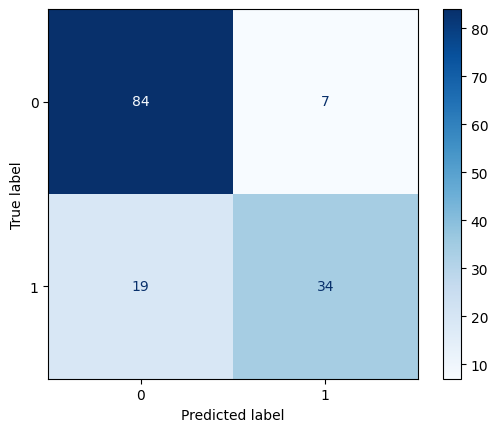

In [251]:
y_pred = rf_model.predict(test_x)

cm = confusion_matrix(test_y, y_pred)

chart = ConfusionMatrixDisplay(cm)

chart.plot(cmap='Blues')

## 4.5. Exporting model

In [252]:
import joblib

joblib.dump(rf_model, 'trained_model.pkl')

['trained_model.pkl']